### This script creates histograms, heatmaps, and a PCA with loadings from all metagenome functional profiles. 
### Requires all metagenomes functional profiles to be concatanated together into one file

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sys

### Histogram of Genome Counts per Bin

In [2]:
binary = pd.read_csv('AllBiomesBinaryFinal.txt', delimiter = '\t', index_col= 0) #this is every genome, EC, and the biome it is in. Cresten Concatanated each dataframe. 
# binary.columns 
binary.head()


,1_1_1_1,1_1_1_2,1_1_1_3,1_1_1_4,1_1_1_5,1_1_1_6,1_1_1_7,1_1_1_8,1_1_1_9,1_1_1_10,...,7_6_2_8,7_6_2_9,7_6_2_10,7_6_2_11,7_6_2_12,7_6_2_13,7_6_2_14,7_6_2_15,7_6_2_16,Biome
Name_of_Genome,,,,,,,,,,,,,,,,,,,,,
3300056625_228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ActivatedSludge
3300056625_197,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,ActivatedSludge
3300055001_136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ActivatedSludge
3300055001_94,1,1,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,ActivatedSludge
3300056626_306,0,1,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,ActivatedSludge


In [3]:
binary.index #index is our genomes
binary['Biome'] = binary['Biome'].astype('category')
# binary.dtypes


In [4]:
sums = binary.loc[ :, binary.columns != 'Biome']
sums = sums.sum()
sums

1_1_1_1     3586
1_1_1_2     1557
1_1_1_3     4531
1_1_1_4      483
1_1_1_5        0
            ... 
7_6_2_12     138
7_6_2_13     734
7_6_2_14    1956
7_6_2_15     201
7_6_2_16     612
Length: 8269, dtype: int64

In [5]:
counts = binary['Biome'].value_counts()
counts = pd.DataFrame(counts)
counts = counts.rename(index={'ActivatedSludge': 'Activated Sludge', 'BulkSoil': 'Bulk Soil', 'LakeSediment': 'Lake Sediment', 'CowRumen':'Cow Rumen', 'RiverSediment':'River Sediment'})
counts = counts.rename(columns={'count': 'Total Genomes'})
counts = counts.reset_index()
counts

,Biome,Total Genomes
0,Bulk Soil,2267
1,Lake Sediment,2186
2,Activated Sludge,1374
3,Cow Rumen,1293
4,River Sediment,633


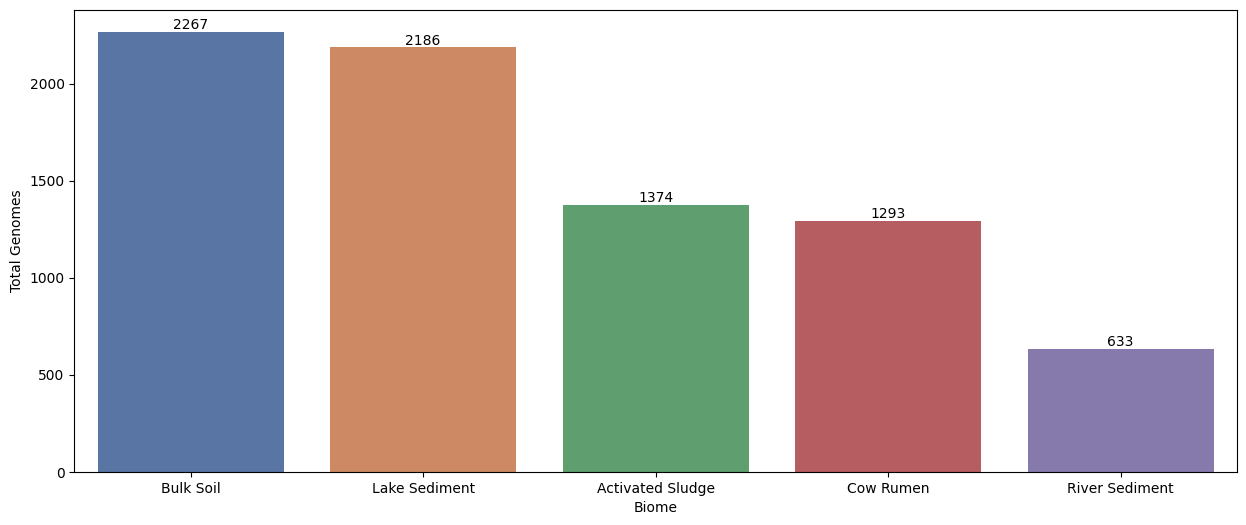

In [6]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='Biome', y='Total Genomes', data = counts, palette = 'deep')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [7]:
column_sums = binary.groupby(by='Biome', observed=False).sum()
ec_sums = pd.DataFrame(column_sums)
clean = ec_sums.rename(index={'ActivatedSludge': 'Activated Sludge', 'BulkSoil': 'Bulk Soil', 'LakeSediment': 'Lake Sediment', 'CowRumen':'Cow Rumen', 'RiverSediment':'River Sediment'})
# for col in clean.columns:
#     if clean[col].sum()<=100:
#         del clean[col]
# print(ec_sums)
clean

# test = clean.loc['Activated Sludge'].sum()
# test

,1_1_1_1,1_1_1_2,1_1_1_3,1_1_1_4,1_1_1_5,1_1_1_6,1_1_1_7,1_1_1_8,1_1_1_9,1_1_1_10,...,7_6_2_7,7_6_2_8,7_6_2_9,7_6_2_10,7_6_2_11,7_6_2_12,7_6_2_13,7_6_2_14,7_6_2_15,7_6_2_16
Biome,,,,,,,,,,,,,,,,,,,,,
Activated Sludge,411,373,751,46,0,43,0,1,86,86,...,135,171,92,306,552,57,86,270,33,130
Bulk Soil,1726,416,1564,273,0,85,0,0,271,191,...,617,367,499,775,1487,41,397,803,86,263
Cow Rumen,273,64,607,20,0,112,0,1,37,5,...,45,131,90,109,702,8,39,257,13,26
Lake Sediment,840,504,1208,84,0,114,0,0,156,25,...,175,265,145,254,822,9,168,478,42,111
River Sediment,336,200,401,60,0,28,0,0,45,25,...,84,75,107,127,349,23,44,148,27,82


In [8]:
clean.iloc[0] = clean.iloc[0].div(1374).astype('float64')
clean.iloc[1] = clean.iloc[1].div(2267).astype('float64')
clean.iloc[2] = clean.iloc[2].div(1293).astype('float64')
clean.iloc[3] = clean.iloc[3].div(2183).astype('float64')
clean.iloc[4] = clean.iloc[4].div(633).astype('float64')


# clean.loc['Bulk Soil'] = (clean['Bulk Soil'] / 2267) 
# clean.loc['Cow Rumen'] = (clean['Cow Rumen'] / 1293) 
# clean.loc['Lake Sediment'] = (clean['Lake Sediment'] / 2186) 
# clean.loc['River Sediment'] = (clean['River Sediment'] / 633) 
clean

/tmp/ipykernel_236733/2166107612.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.29912663755458513' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  clean.iloc[0] = clean.iloc[0].div(1374).astype('float64')
/tmp/ipykernel_236733/2166107612.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2714701601164483' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  clean.iloc[0] = clean.iloc[0].div(1374).astype('float64')
/tmp/ipykernel_236733/2166107612.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5465793304221251' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  clean.iloc[0] = clean.iloc[0].div(1374).astype('floa

,1_1_1_1,1_1_1_2,1_1_1_3,1_1_1_4,1_1_1_5,1_1_1_6,1_1_1_7,1_1_1_8,1_1_1_9,1_1_1_10,...,7_6_2_7,7_6_2_8,7_6_2_9,7_6_2_10,7_6_2_11,7_6_2_12,7_6_2_13,7_6_2_14,7_6_2_15,7_6_2_16
Biome,,,,,,,,,,,,,,,,,,,,,
Activated Sludge,0.299127,0.271470,0.546579,0.033479,0,0.031295,0,0.000728,0.062591,0.062591,...,0.098253,0.124454,0.066958,0.222707,0.401747,0.041485,0.062591,0.196507,0.024017,0.094614
Bulk Soil,0.761359,0.183502,0.689899,0.120423,0,0.037494,0,0.000000,0.119541,0.084252,...,0.272166,0.161888,0.220115,0.341861,0.655933,0.018086,0.175121,0.354213,0.037936,0.116012
Cow Rumen,0.211137,0.049497,0.469451,0.015468,0,0.086620,0,0.000773,0.028616,0.003867,...,0.034803,0.101315,0.069606,0.084300,0.542923,0.006187,0.030162,0.198763,0.010054,0.020108
Lake Sediment,0.384792,0.230875,0.553367,0.038479,0,0.052222,0,0.000000,0.071461,0.011452,...,0.080165,0.121393,0.066422,0.116354,0.376546,0.004123,0.076958,0.218965,0.019240,0.050847
River Sediment,0.530806,0.315956,0.633491,0.094787,0,0.044234,0,0.000000,0.071090,0.039494,...,0.132701,0.118483,0.169036,0.200632,0.551343,0.036335,0.069510,0.233807,0.042654,0.129542


Biome
Activated Sludge    0.084425
Bulk Soil           0.164094
Cow Rumen           0.308585
Lake Sediment       0.071461
River Sediment      0.132701
Name: 4_2_1_8, dtype: float64

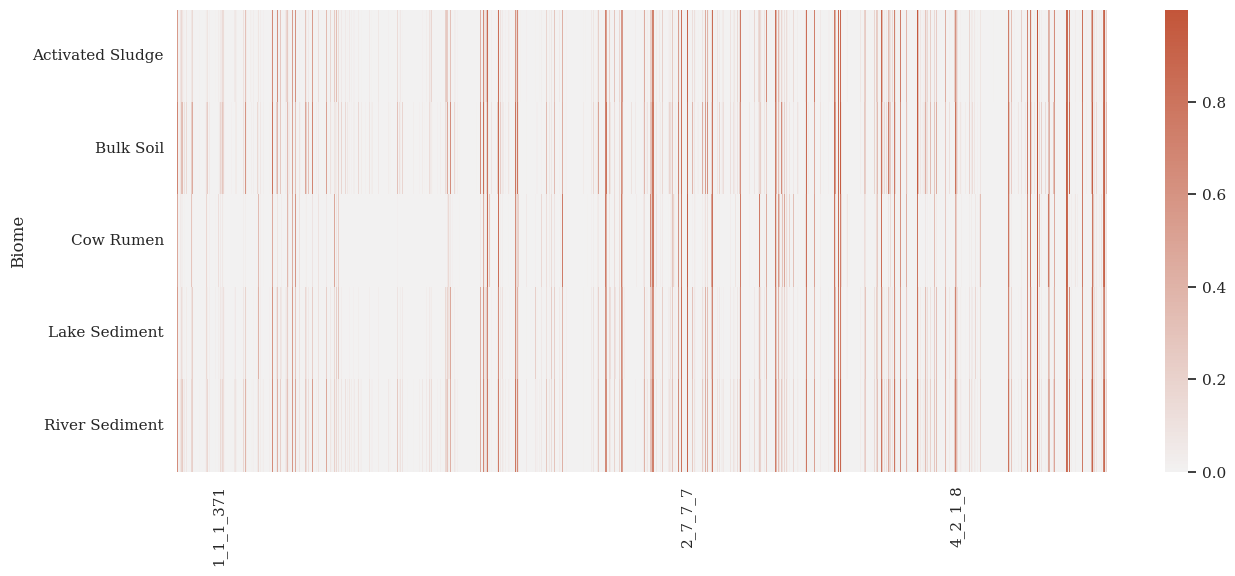

In [9]:
sns.set_context(context = 'paper')
sns.set_theme(font='serif')
plt.figure(figsize=(15,6))
color = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(data=clean, alpha = 1, center=0, cmap=color)
ticks = plt.gca().get_xticks()
selected_labels = ['1_1_1_371', '2_7_7_7', '4_2_1_8']
selected_xticks = [i for i, label in enumerate(clean.columns) if label in selected_labels]
plt.xticks(ticks=selected_xticks, labels = selected_labels)
# plt.show()
clean['4_2_1_8']

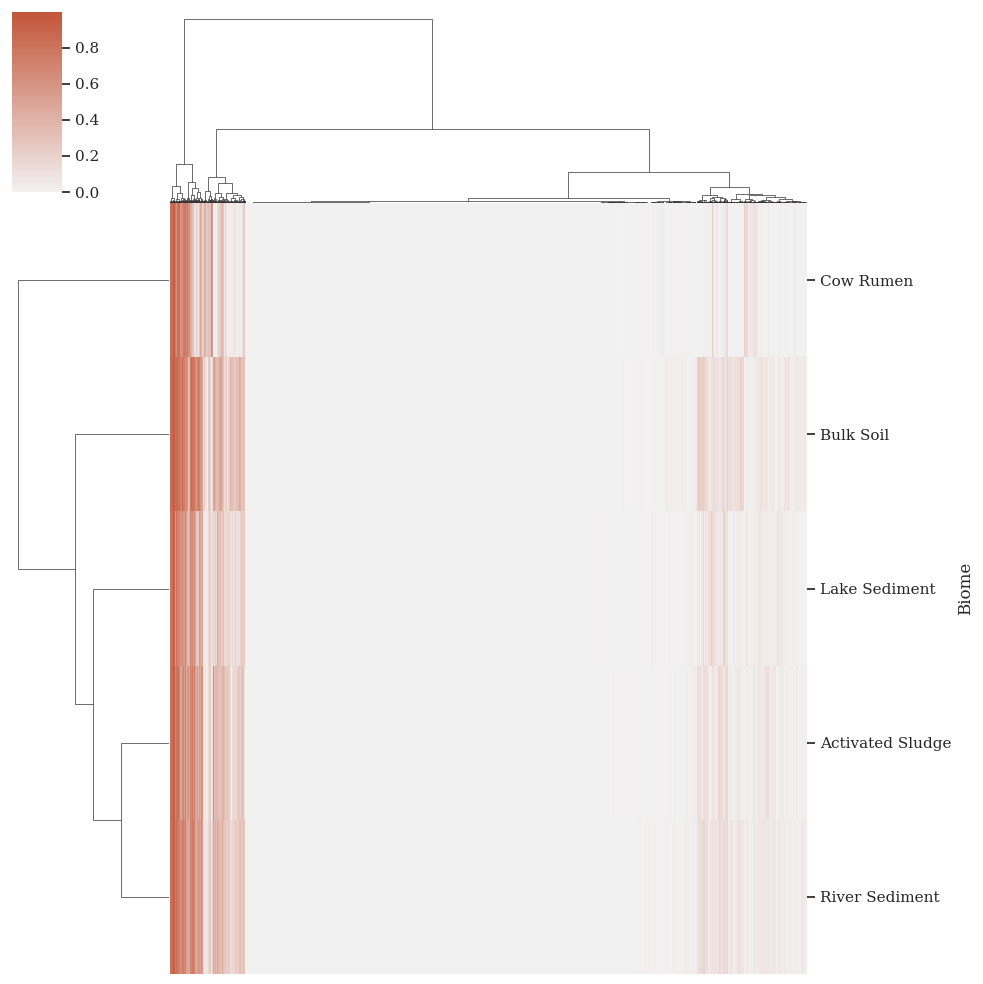

In [10]:
sys.setrecursionlimit(5000)  # Set a higher limit
sns.set_context(context = 'paper')
sns.set_theme(font='serif')
sns.clustermap(clean, method = 'ward', metric='euclidean', cmap = color, center = 0, xticklabels = False)
plt.show()


Text(318.6590909090909, 0.5, 'Biome')

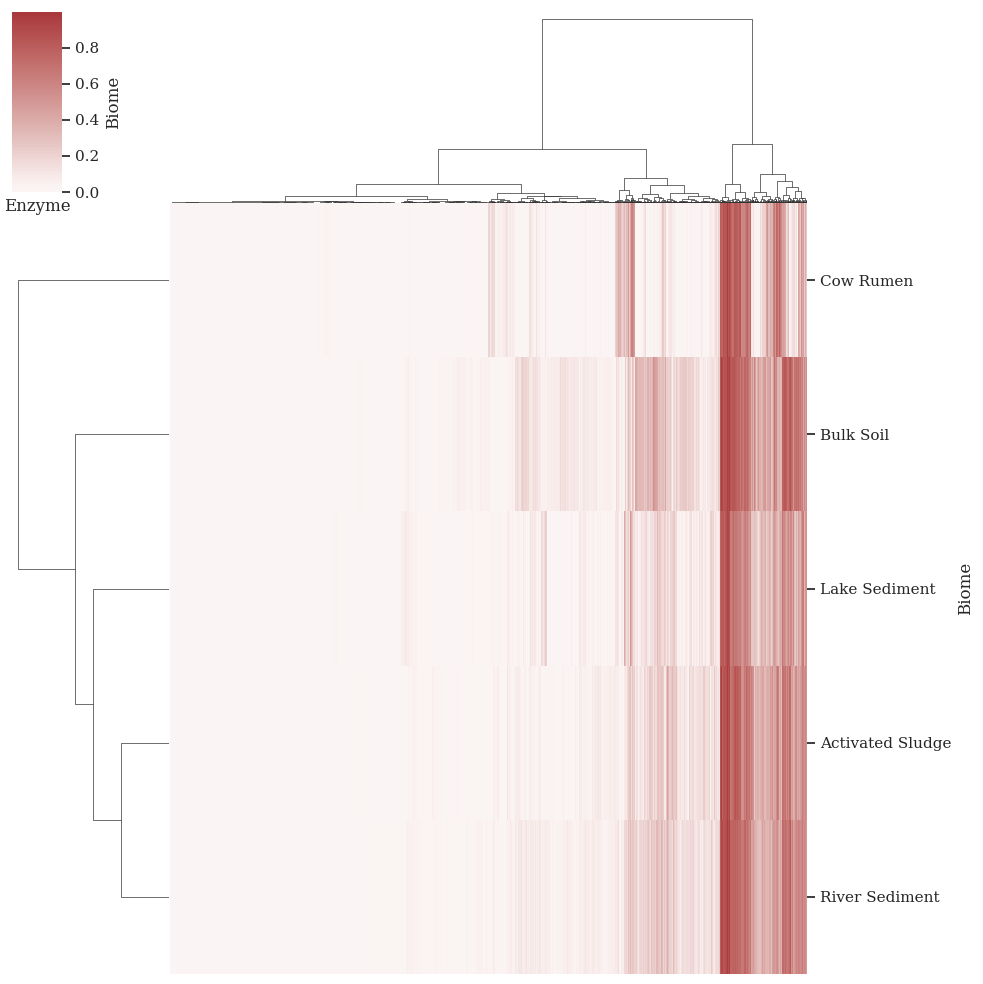

In [11]:
no_zero = clean.loc[:, clean.sum() !=0]
sns.clustermap(no_zero, method = 'ward', metric='euclidean', cmap = 'vlag', center = 0, xticklabels = False)
plt.xlabel('Enzyme')
plt.ylabel('Biome')

In [12]:
sns.set_context(context = 'paper')
sns.set_style('white')
sns.set_theme(font='serif')
plt.figure(figsize=(20,10))

melted = clean.reset_index().melt(id_vars='Biome', var_name='Enzyme', value_name='Value')
melted
# sns.set_style('white')
# sns.scatterplot(data = melted, x= 'Value', y='Enzyme', hue = 'Biome', palette='magma')
# plt.gca().set_yticklabels([])
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


,Biome,Enzyme,Value
0,Activated Sludge,1_1_1_1,0.299127
1,Bulk Soil,1_1_1_1,0.761359
2,Cow Rumen,1_1_1_1,0.211137
3,Lake Sediment,1_1_1_1,0.384792
4,River Sediment,1_1_1_1,0.530806
...,...,...,...
41340,Activated Sludge,7_6_2_16,0.094614
41341,Bulk Soil,7_6_2_16,0.116012
41342,Cow Rumen,7_6_2_16,0.020108
41343,Lake Sediment,7_6_2_16,0.050847


<Figure size 2000x1000 with 0 Axes>

### Principle Component Analysis
#### Feature: Original variables in the dataset. In this case, Enzyme presence / absence are the features
#### Loadings: Importance of each feature in a specific component -> expressed as a coefficient 

In [13]:
x= binary.loc[:, binary.columns[:-1]]
x

,1_1_1_1,1_1_1_2,1_1_1_3,1_1_1_4,1_1_1_5,1_1_1_6,1_1_1_7,1_1_1_8,1_1_1_9,1_1_1_10,...,7_6_2_7,7_6_2_8,7_6_2_9,7_6_2_10,7_6_2_11,7_6_2_12,7_6_2_13,7_6_2_14,7_6_2_15,7_6_2_16
Name_of_Genome,,,,,,,,,,,,,,,,,,,,,
3300056625_228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3300056625_197,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3300055001_136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3300055001_94,1,1,1,0,0,0,0,0,0,0,...,1,1,0,1,1,0,0,0,0,0
3300056626_306,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236876025_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3300021387_92,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3300021254_46,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [14]:
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

In [15]:
pca = PCA(n_components=10)
pca_result = pca.fit(scaled)

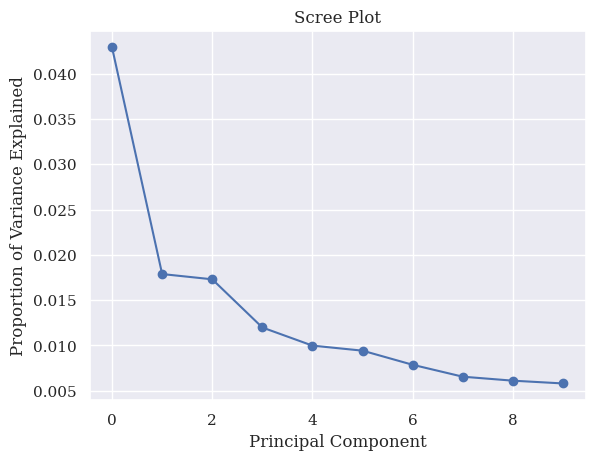

In [16]:
# How much variance is explained by each component. Ratio is due to the large number of components, i.e. total enzymes in the dataset. 
# print(pca_result.explained_variance_ratio_)

plt.plot(pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


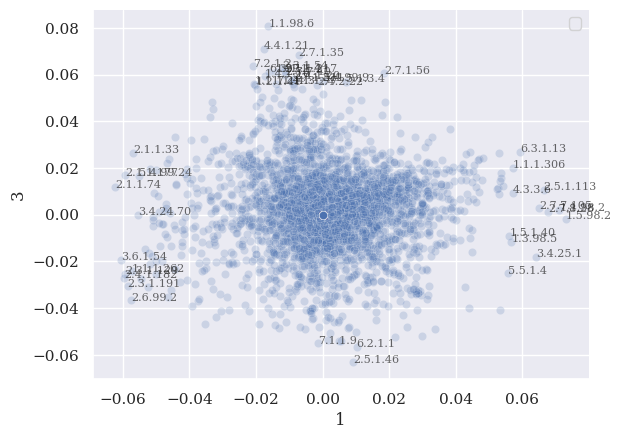

In [17]:
components = pd.DataFrame(pca_result.components_)
columns = x.columns
ec_dot = [s.replace('_', '.') for s in columns]
components.columns = ec_dot
components
loadings = components.iloc[[1,3]]
loadings

sns.scatterplot(data=loadings, x=loadings.iloc[0], y=loadings.iloc[1], alpha=0.2)

# Add labels for each point
for i in range(len(loadings.columns) - 1):
    if max(abs(loadings.iloc[0, i]), abs(loadings.iloc[1, i])) > 0.055:
        then: plt.text(loadings.iloc[0, i], loadings.iloc[1, i], loadings.columns[i], fontsize=8, alpha=0.7)
    else: 
        print('')

sns.despine()
plt.legend()
plt.show()

In [18]:
ec_dot = [s.replace('_', '.') for s in columns]
ec_dot
        

['1.1.1.1',
 '1.1.1.2',
 '1.1.1.3',
 '1.1.1.4',
 '1.1.1.5',
 '1.1.1.6',
 '1.1.1.7',
 '1.1.1.8',
 '1.1.1.9',
 '1.1.1.10',
 '1.1.1.11',
 '1.1.1.12',
 '1.1.1.13',
 '1.1.1.14',
 '1.1.1.15',
 '1.1.1.16',
 '1.1.1.17',
 '1.1.1.18',
 '1.1.1.19',
 '1.1.1.20',
 '1.1.1.21',
 '1.1.1.22',
 '1.1.1.23',
 '1.1.1.24',
 '1.1.1.25',
 '1.1.1.26',
 '1.1.1.27',
 '1.1.1.28',
 '1.1.1.29',
 '1.1.1.30',
 '1.1.1.31',
 '1.1.1.32',
 '1.1.1.33',
 '1.1.1.34',
 '1.1.1.35',
 '1.1.1.36',
 '1.1.1.37',
 '1.1.1.38',
 '1.1.1.39',
 '1.1.1.40',
 '1.1.1.41',
 '1.1.1.42',
 '1.1.1.43',
 '1.1.1.44',
 '1.1.1.45',
 '1.1.1.46',
 '1.1.1.47',
 '1.1.1.48',
 '1.1.1.49',
 '1.1.1.50',
 '1.1.1.51',
 '1.1.1.52',
 '1.1.1.53',
 '1.1.1.54',
 '1.1.1.55',
 '1.1.1.56',
 '1.1.1.57',
 '1.1.1.58',
 '1.1.1.59',
 '1.1.1.60',
 '1.1.1.61',
 '1.1.1.62',
 '1.1.1.63',
 '1.1.1.64',
 '1.1.1.65',
 '1.1.1.66',
 '1.1.1.67',
 '1.1.1.68',
 '1.1.1.69',
 '1.1.1.70',
 '1.1.1.71',
 '1.1.1.72',
 '1.1.1.73',
 '1.1.1.74',
 '1.1.1.75',
 '1.1.1.76',
 '1.1.1.77',
 '1.1.1.

#### 

In [19]:
# These are the PC's themselves. Since there are 8269 columns, which is the same as the original dataset, no dimenstionality reduction has occured. Shows little redundancy or correlation between variables 
components = pd.DataFrame(pca_result.components_)
components

binary.reset_index
biome = pd.DataFrame(binary['Biome'].values)
components['Biome'] = biome
components

sns.set_context(context = 'paper')
# sns.set_theme(font='helvetica')
sns.set_style(style='white')
sns.scatterplot(data= components)

<Axes: >

ValueError: Image size of 564x158059 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [20]:
variability = pd.DataFrame(pca_result.explained_variance_ratio_)
variability


,0
0,0.042892
1,0.017880
2,0.017300
3,0.011981
4,0.009981
5,0.009424
6,0.007865
7,0.006551
8,0.006112
9,0.005805


In [21]:
x_pca = pd.DataFrame(pca_result.transform(x)) #projects x into the original dataseta 
x_pca 
biome = pd.DataFrame(binary['Biome'].values)
x_pca['Biome'] = biome
x_pca

/home/anna/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,Biome
0,2.469192,-1.485247,2.368959,0.781734,-0.446242,0.794958,-0.980593,-0.370162,-0.176189,1.652513,ActivatedSludge
1,10.620828,-5.261133,10.605785,-3.078067,-1.247998,-0.139981,1.863929,-2.221984,-4.173502,8.378431,ActivatedSludge
2,8.072846,-3.191585,5.614093,0.612598,1.846477,5.187043,-1.109910,-1.887985,-1.548265,4.323820,ActivatedSludge
3,14.902075,-7.047236,2.919073,0.520870,0.586756,4.872655,0.194616,2.880572,-1.206816,5.158311,ActivatedSludge
4,10.439797,-4.568875,7.744617,0.944597,3.245165,5.973533,-1.381114,-2.741681,-1.321531,5.124180,ActivatedSludge
...,...,...,...,...,...,...,...,...,...,...,...
7748,7.489392,-5.481549,8.603735,3.191610,1.279550,3.099804,2.126366,-2.782263,-2.129748,5.601743,CowRumen
7749,5.186596,-4.272354,7.293659,4.532800,1.785562,1.555346,2.677082,-1.580944,-1.704872,3.281315,CowRumen
7750,7.597143,-4.369798,7.843876,7.363328,2.638574,4.596996,0.427347,-0.151762,-1.370484,5.711346,CowRumen
7751,6.503240,-3.368146,8.146902,6.388033,2.476848,1.806805,1.014676,0.700601,-0.866742,3.922168,CowRumen


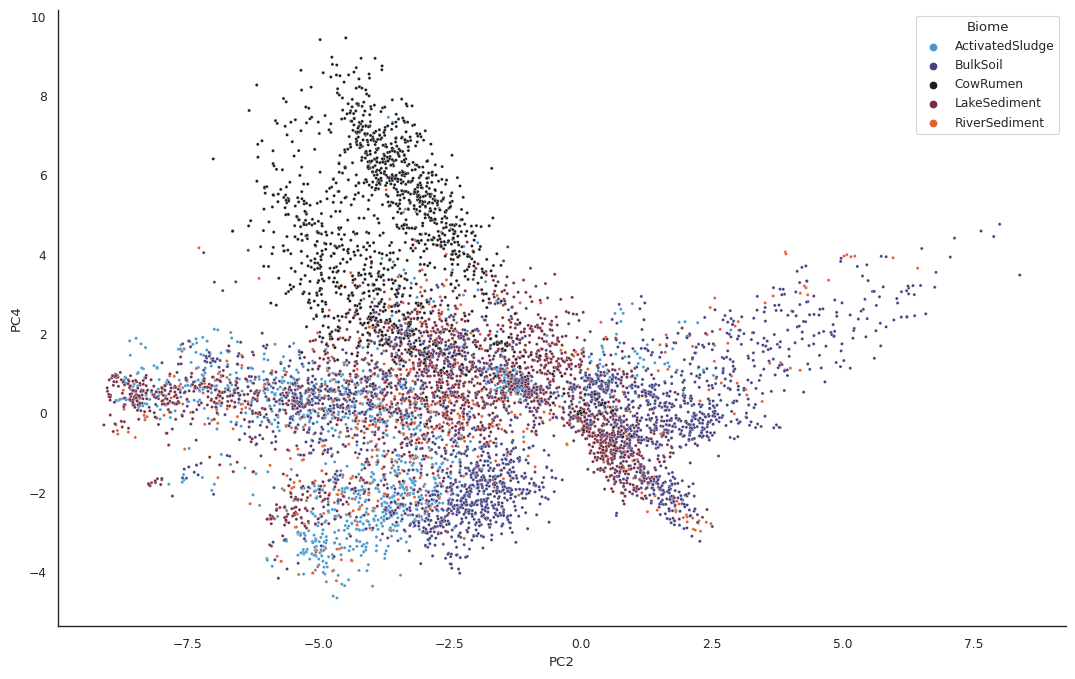

In [22]:
sns.set_context(context = 'paper')
# sns.set_theme(font='helvetica')
plt.figure(figsize=(13,8))
sns.set_style(style='white')
sns.scatterplot(data= x_pca, x = 1, y= 3, alpha=1, s=5, hue='Biome', legend='brief', palette='icefire')
sns.despine()
# ax.grid(False)
# plt.legend(title="Biomes", fontsize='small', markerscale=0.4, facecolor='white')  # Smaller legend text and marker size
plt.xlabel('PC2')
plt.ylabel('PC4')
# plt.grid(True)
plt.show()

In [23]:
clean


,1_1_1_1,1_1_1_2,1_1_1_3,1_1_1_4,1_1_1_5,1_1_1_6,1_1_1_7,1_1_1_8,1_1_1_9,1_1_1_10,...,7_6_2_7,7_6_2_8,7_6_2_9,7_6_2_10,7_6_2_11,7_6_2_12,7_6_2_13,7_6_2_14,7_6_2_15,7_6_2_16
Biome,,,,,,,,,,,,,,,,,,,,,
Activated Sludge,0.299127,0.271470,0.546579,0.033479,0,0.031295,0,0.000728,0.062591,0.062591,...,0.098253,0.124454,0.066958,0.222707,0.401747,0.041485,0.062591,0.196507,0.024017,0.094614
Bulk Soil,0.761359,0.183502,0.689899,0.120423,0,0.037494,0,0.000000,0.119541,0.084252,...,0.272166,0.161888,0.220115,0.341861,0.655933,0.018086,0.175121,0.354213,0.037936,0.116012
Cow Rumen,0.211137,0.049497,0.469451,0.015468,0,0.086620,0,0.000773,0.028616,0.003867,...,0.034803,0.101315,0.069606,0.084300,0.542923,0.006187,0.030162,0.198763,0.010054,0.020108
Lake Sediment,0.384792,0.230875,0.553367,0.038479,0,0.052222,0,0.000000,0.071461,0.011452,...,0.080165,0.121393,0.066422,0.116354,0.376546,0.004123,0.076958,0.218965,0.019240,0.050847
River Sediment,0.530806,0.315956,0.633491,0.094787,0,0.044234,0,0.000000,0.071090,0.039494,...,0.132701,0.118483,0.169036,0.200632,0.551343,0.036335,0.069510,0.233807,0.042654,0.129542
